# Plot OSG Percentiles with Current HRRR Forecasts for a Point

In [91]:
%matplotlib inline

import h5py
import matplotlib.pyplot as plt
import numpy as np
from collections import OrderedDict
from datetime import datetime, timedelta
import multiprocessing

from mpl_toolkits.basemap import Basemap

import sys
sys.path.append('/uufs/chpc.utah.edu/common/home/u0553130/pyBKB_v2')
from BB_downloads.HRRR_S3 import *
from BB_wx_calcs.wind import wind_uv_to_spd
from BB_data.grid_manager import pluck_point_new
from BB_MesoWest.MesoWest_STNinfo import get_MW_location_dict

from matplotlib.dates import DateFormatter
formatter = DateFormatter('%b %d\n%H:%M')

import matplotlib as mpl 
mpl.rcParams['figure.figsize'] = [8, 6]
mpl.rcParams['figure.titlesize'] = 15
mpl.rcParams['figure.titleweight'] = 'bold'
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10
mpl.rcParams['axes.labelsize'] = 10
mpl.rcParams['axes.titlesize'] = 12
mpl.rcParams['lines.linewidth'] = 1.8
mpl.rcParams['grid.linewidth'] = .25
mpl.rcParams['figure.subplot.wspace'] = 0.05
mpl.rcParams['figure.subplot.hspace'] = 0.05
mpl.rcParams['legend.fontsize'] = 8
mpl.rcParams['legend.framealpha'] = .75
mpl.rcParams['legend.loc'] = 'best'
mpl.rcParams['savefig.bbox'] = 'tight'
mpl.rcParams['savefig.dpi'] = 100

In [2]:
DATE = datetime(2018, 2, 16, 0)

stn = 'WBB'

var = 'TMP:2 m'

# MesoWest Station Info
LD = get_MW_location_dict(stn)
MWlat = LD[stn]['latitude']
MWlon = LD[stn]['longitude']

In [3]:
# Load HRRR lat/lon Grid
DIR = '/uufs/chpc.utah.edu/common/home/horel-group2/blaylock/HRRR_OSG/'
latlon_file = h5py.File(DIR+'OSG_HRRR_latlon.h5', 'r')
lat = latlon_file['latitude'].value
lon = latlon_file['longitude'].value

In [4]:
# Pluck point
point = pluck_point_new(MWlat, MWlon, lat, lon)
x = point[0][0]
y = point[1][0]

print lat[x,y], MWlat, 'and',lon[x,y], MWlon

40.75462 40.76623 and -111.83506 -111.84755


## Get OSG Percentiles for a Point

In [99]:
variable = var.replace(':', '_').replace(' ', '_')
DIR = '/uufs/chpc.utah.edu/common/home/horel-group2/blaylock/HRRR_OSG/hourly30/%s/' % (variable)
FILE = 'OSG_HRRR_%s_m%02d_d%02d_h%02d_f00.h5' % ((variable, DATE.month, DATE.day, DATE.hour))
print DIR+FILE

percentiles = [0,1,2,3,4,5,10,25,33,50,66,75,90,95,96,97,98,99,100]
PP = np.array([])
with h5py.File(DIR+FILE, 'r') as f:
    for i in percentiles:
        PP = np.append(PP, f["p%02d" % i][x][y])

# Convert Units
if var == 'TMP:2 m' or var == 'DPT:2 m':
    PP -= 273.15

/uufs/chpc.utah.edu/common/home/horel-group2/blaylock/HRRR_OSG/hourly30/TMP_2_m/OSG_HRRR_TMP_2_m_m02_d10_h00_f00.h5


## Get Current HRRR Run

In [111]:
H = get_hrrr_variable(DATE, var, value_only=True, verbose=False)
Hpoint = H['value'][x][y]-273.15
percentiles = [0,1,2,3,4,5,10,25,33,50,66,75,90,95,96,97,98,99,100]

In [140]:
# Linear interpolation to find the percentile for the value
y1 = np.min(filter(lambda x: x>=Hpoint, PP))
y2 = np.max(filter(lambda x: x<=Hpoint, PP))
y1_idx = np.where(PP==y1)[0][0]
y2_idx = np.where(PP==y2)[0][0]
x1 = percentiles[y1_idx]
x2 = percentiles[y2_idx]
print y1, x1
print y2, x2

print Hpoint

2.778 25
-2.417 10
0.617578125


In [136]:
m = (y2-y1)/(x2-x1)
b = 0-m*x1+y1

Y = Hpoint
X = (Y-b)/m

print m
print pp
print b

0.347
25.0086455331
-8.678


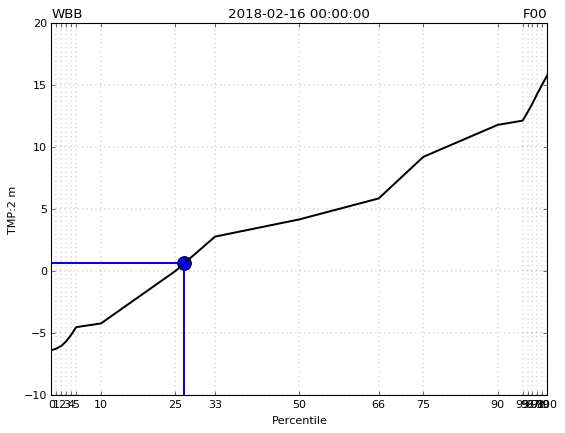

In [138]:
# Plot Percentile Curve
plt.plot(percentiles, PP, color='k')

# Plot Current HRRR Value
plt.axhline(Hpoint, xmax=X/100)
plt.axvline(X, ymax=(10+Hpoint)/30)
plt.scatter(X,Hpoint, s=150)

plt.grid()

plt.xlabel('Percentile')
plt.xticks(percentiles)
plt.xlim([0,100])
plt.ylabel(var)
plt.title(DATE, loc='center')
plt.title(stn, loc='left')
plt.title('F00', loc='right')

## Loop a Whole Day and forecast hours: Point

/uufs/chpc.utah.edu/common/home/horel-group2/blaylock/HRRR_OSG/hourly30/TMP_2_m/OSG_HRRR_TMP_2_m_m02_d16_h00_f00.h5
/uufs/chpc.utah.edu/common/home/horel-group2/blaylock/HRRR_OSG/hourly30/TMP_2_m/OSG_HRRR_TMP_2_m_m02_d15_h23_f00.h5
/uufs/chpc.utah.edu/common/home/horel-group2/blaylock/HRRR_OSG/hourly30/TMP_2_m/OSG_HRRR_TMP_2_m_m02_d15_h22_f00.h5
/uufs/chpc.utah.edu/common/home/horel-group2/blaylock/HRRR_OSG/hourly30/TMP_2_m/OSG_HRRR_TMP_2_m_m02_d15_h21_f00.h5
/uufs/chpc.utah.edu/common/home/horel-group2/blaylock/HRRR_OSG/hourly30/TMP_2_m/OSG_HRRR_TMP_2_m_m02_d15_h20_f00.h5
/uufs/chpc.utah.edu/common/home/horel-group2/blaylock/HRRR_OSG/hourly30/TMP_2_m/OSG_HRRR_TMP_2_m_m02_d15_h19_f00.h5
/uufs/chpc.utah.edu/common/home/horel-group2/blaylock/HRRR_OSG/hourly30/TMP_2_m/OSG_HRRR_TMP_2_m_m02_d15_h18_f00.h5
/uufs/chpc.utah.edu/common/home/horel-group2/blaylock/HRRR_OSG/hourly30/TMP_2_m/OSG_HRRR_TMP_2_m_m02_d15_h17_f00.h5
/uufs/chpc.utah.edu/common/home/horel-group2/blaylock/HRRR_OSG/hourly30/

TypeError: 'float' object has no attribute '__getitem__'

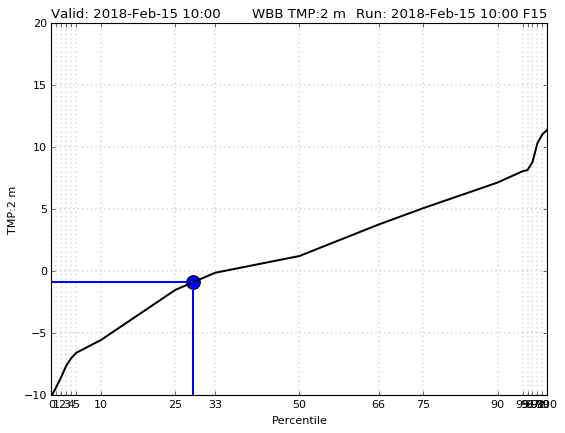

In [5]:
fxx = range(0,19)

variable = var.replace(':', '_').replace(' ', '_')
DIR = '/uufs/chpc.utah.edu/common/home/horel-group2/blaylock/HRRR_OSG/hourly30/%s/' % (variable)

percentiles = [0,1,2,3,4,5,10,25,33,50,66,75,90,95,96,97,98,99,100]

DATES = [DATE-timedelta(hours=h) for h in range(0,24)]

for i, D in enumerate(DATES):
    FILE = 'OSG_HRRR_%s_m%02d_d%02d_h%02d_f00.h5' % ((variable, D.month, D.day, D.hour))
    print DIR+FILE

    PP = np.array([])
    with h5py.File(DIR+FILE, 'r') as f:
        for i in percentiles:
            PP = np.append(PP, f["p%02d" %i][x][y])

    # Convert Units
    if var == 'TMP:2 m' or var == 'DPT:2 m':
        PP -= 273.15

    for f in fxx:   
        run = D-timedelta(hours=f)
        H = get_hrrr_variable(run, var, fxx=f, verbose=False)
        Hpoint = H['value'][x][y]-273.15

        # Linear interpolation to find the percentile for the value
        y1 = np.min(filter(lambda x: x>=Hpoint, PP))
        y2 = np.max(filter(lambda x: x<=Hpoint, PP))
        y1_idx = np.where(PP==y1)[0][0]
        y2_idx = np.where(PP==y2)[0][0]
        x1 = percentiles[y1_idx]
        x2 = percentiles[y2_idx]
        m = (y2-y1)/(x2-x1)
        b = 0-m*x1+y1
        Y = Hpoint
        X = (Y-b)/m
        
        ## Plot
        # Plot Percentile Curve
        plt.clf()
        plt.cla()
        # Plot Percentile Curve
        plt.plot(percentiles, PP, color='k')

        # Plot Current HRRR Value
        plt.axhline(Hpoint, xmax=X/100)
        plt.axvline(X, ymax=(10+Hpoint)/30)
        plt.scatter(X, Hpoint, s=150)

        plt.grid()

        plt.xlabel('Percentile')
        plt.xticks(percentiles)
        plt.xlim([0,100])
        plt.ylabel(var)
        plt.ylim([-10, 20])
        plt.title('Valid: %s' % D.strftime('%Y-%b-%d %H:%M'), loc='Left')
        plt.title('%s %s' % (stn, var), loc='Center')
        plt.title('Run: %s F%02d' % (D.strftime("%Y-%b-%d %H:%M"), f), loc='right')

        plt.savefig('/uufs/chpc.utah.edu/common/home/u0553130/public_html/PhD/HRRR/OSG/point_current_HRRR/%s_f%02d.png' % (D.strftime('%Y-%m-%d_%H'), f))

## Area Percentiles and Current HRRR

In [123]:
## Area Percentiles and Current HRRR

var = 'TMP:2 m'
var = 'UVGRD:10 m'
var = 'DPT:2 m'
#var = 'REFC:entire'

variable = var.replace(':', '_').replace(' ', '_')
DIR = '/uufs/chpc.utah.edu/common/home/horel-group2/blaylock/HRRR_OSG/hourly30/%s/' % (variable)

percentiles = [0,1,2,3,4,5,10,25,33,50,66,75,90,95,96,97,98,99,100]
box_radius = 5

sDATE = datetime(2018, 2, 18, 0)
DATES = [sDATE+timedelta(hours=h) for h in range(24)]

if var == 'TMP:2 m':
    ymin = -20
    ymax = 30
elif var == 'DPT:2 m':
    ymin = -25
    ymax = 15
elif var == 'REFC:entire':
    ymin = -10
    ymax = 50
elif var == 'UVGRD:10 m':
    ymin = 0
    ymax = 20
elif var == 'UVGRD:80 m':
    ymin = 0
    ymax = 30
else:
    ymin = 0
    ymax = 20

for D in DATES:

    ## Get area OSG percentiles from the bounding box for each percentile
    FILE = 'OSG_HRRR_%s_m%02d_d%02d_h%02d_f00.h5' % ((variable, D.month, D.day, D.hour))
    print DIR+FILE
    
    with h5py.File(DIR+FILE, 'r') as ff:
        for i in percentiles:
            pp = ff["p%02d" %i][x-box_radius:x+box_radius+1,y-box_radius:y+box_radius+1]
            if i == 0:
                PP = pp
            else:
                PP = np.dstack([PP, pp])

    ## Convert Units
    if var == 'TMP:2 m' or var == 'DPT:2 m':
        PP -= 273.15

    ## Clalculate area percentiles from the OSG percentiles
    for i in range(19):
        p = np.percentile(PP[:,:,i], [0, 25, 50, 75, 100])
        if i == 0:
            area_P = p
        else:
            area_P = np.dstack([area_P, p])
    
    
    ## For this valid date, loop through each forecast hour
    for f in range(19):
        plt.clf()
        plt.cla()
        
        ## HRRR Model Run date
        RUN = D-timedelta(hours=f)
        
        ## Get HRRR data for this run
        if var.split(':')[0] == 'UVGRD':
            # Calculate wind speed from U and V components
            level = var.split(':')[1]
            HU = get_hrrr_variable(RUN, 'UGRD:'+level, fxx=f, value_only=True, verbose=False)    
            HV = get_hrrr_variable(RUN, 'VGRD:'+level, fxx=f, value_only=True, verbose=False)
            speed = wind_uv_to_spd(HU['value'], HV['value'])
            H = HU
            H['value'] = speed
        else:
            H = get_hrrr_variable(RUN, var, fxx=f, value_only=True, verbose=False)

        
        ## Convert units and get values in bounding box area
        if var == 'TMP:2 m' or var == 'DPT:2 m':
            Hpoint = H['value'][x,y]-273.15
            Harea = H['value'][x-box_radius:x+box_radius+1,y-box_radius:y+box_radius+1]-273.15    
        else:
            Hpoint = H['value'][x,y]
            Harea = H['value'][x-box_radius:x+box_radius+1,y-box_radius:y+box_radius+1]
        
        
        ## Calculate the HRRR percentiles in the boxed area for this run
        HP = np.percentile(Harea, [0,25,50,75,100])

        
        ## --- Plot OSG percentiles ---------------------------------------
        plt.fill_between(percentiles, area_P[0][0], area_P[0][4],
                         color='lightgrey',
                         label='p100-p00',
                         zorder=1)
        plt.fill_between(percentiles, area_P[0][1], area_P[0][3],
                         color='grey',
                         label='p25-p75',
                         zorder=1)
        plt.plot(percentiles, area_P[0][2],
                 color='lightgrey',
                 label="p50",
                 zorder=1)
        ## Plot all percentiles for each grid box
        #for i in range(box_radius*2+1):
        #    for j in range(box_radius*2+1):
        #        plt.plot(percentiles, PP[i,j,:])
        
        
        ## Plot OSG percentiles for the single grid box nearest the station of interest
        plt.plot(percentiles, PP[box_radius,box_radius,:],
                 linestyle='--',
                 color='k',
                 label='%s OSG Percentiles' % stn,
                 zorder=1)

        
        ## --- Plot RUN percentiles -------------------------------------
        # Linear interpolation to find the percentile for the value
        for i in range(5):
            p100Hpoint = HP[i]
            p100PP = area_P[0][i]
            if p100Hpoint > np.max(p100PP):
                p100Y = p100Hpoint
                p100X = 100
                print "Hpoint > PP, exceeds p100", D, f
            elif p100Hpoint < np.min(p100PP):
                p100Y = p100Hpoint
                p100X = 0
                print "Hpoint < PP exceeds p00", D, f,
            else:
                p100y1 = np.min(filter(lambda x: x>=p100Hpoint, p100PP))
                p100y1_idx = np.where(p100PP==p100y1)[0][0]
                p100x1 = percentiles[p100y1_idx]
                p100y2 = np.max(filter(lambda x: x<=p100Hpoint, p100PP))
                p100y2_idx = np.where(p100PP==p100y2)[0][0]
                p100x2 = percentiles[p100y2_idx]
                p100m = (p100y2-p100y1)/(p100x2-p100x1)
                p100b = 0-p100m*p100x1+p100y1
                p100Y = p100Hpoint
                p100X = (p100Y-p100b)/p100m
            plt.axhline(p100Hpoint, xmax=p100X/100, color='r', linewidth=1, zorder=50)
            plt.axvline(p100X, ymax=(p100Hpoint-ymin)/(ymax-ymin), color='r', linewidth=1, zorder=50)
            plt.scatter(p100X, p100Hpoint, s=25, color='r', zorder=50)
        ## Plot value from current HRRR run for every grid box
        #for i in range(box_radius*2+1):
        #    for j in range(box_radius*2+1):
        #        plt.axhline(Harea[i,j], linewidth=.1)
            
        ## Plot HRRR value for stn grid box for urrent HRRR run
        # Linear interpolation to find the percentile for the value
        stnPP = PP[box_radius,box_radius,:]
        if Hpoint > np.max(stnPP):
            Y = Hpoint
            X = 100
            print "station Hpoint > PP, exceeds p100", D, f
        elif Hpoint < np.min(stnPP):
            Y = Hpoint
            X = 0
            print "station Hpoint < PP, exceeds p00", D, f
        else:
            y1 = np.min(filter(lambda x: x>=Hpoint, stnPP))
            y1_idx = np.where(stnPP==y1)[0][0]
            x1 = percentiles[y1_idx]
            y2 = np.max(filter(lambda x: x<=Hpoint, stnPP))
            y2_idx = np.where(stnPP==y2)[0][0]
            x2 = percentiles[y2_idx]
            m = (y2-y1)/(x2-x1)
            b = 0-m*x1+y1
            Y = Hpoint
            X = (Y-b)/m
        plt.axhline(Hpoint, xmax=X/100, color='k', lw=6, zorder=100)
        plt.axvline(X, ymax=(Hpoint-ymin)/(ymax-ymin), color='k', lw=6, zorder=100)
        plt.scatter(X, Hpoint, s=150, color='k', zorder=100)

        
        ## --- Other Plot Elements --------------------------------------
        plt.grid()
        plt.legend(loc='upper left')

        plt.xlabel('Percentiles\n%sx%s km box centered at %s' % (np.shape(PP)[0]*3, np.shape(PP)[0]*3, stn))
        plt.xticks(percentiles)
        plt.xlim([0,100])
        plt.ylabel(var)
        plt.ylim([ymin, ymax])
        
        plt.title('Valid: %s' % D.strftime('%Y-%b-%d %H:%M'), loc='Left')
        plt.title('%s\n%s' % (stn, var), loc='Center', fontweight='bold')
        plt.title('Run: %s F%02d' % (RUN.strftime("%Y-%b-%d %H:%M"), f), loc='right')

        plt.savefig('/uufs/chpc.utah.edu/common/home/u0553130/public_html/PhD/HRRR/OSG/area_current_HRRR/%s/%s_f%02d.png' % (variable, D.strftime('%Y-%m-%d_%H'), f))
        plt.close()

/uufs/chpc.utah.edu/common/home/horel-group2/blaylock/HRRR_OSG/hourly30/DPT_2_m/OSG_HRRR_DPT_2_m_m02_d18_h00_f00.h5
station Hpoint < PP, exceeds p00 2018-02-18 00:00:00 4
station Hpoint < PP, exceeds p00 2018-02-18 00:00:00 12
/uufs/chpc.utah.edu/common/home/horel-group2/blaylock/HRRR_OSG/hourly30/DPT_2_m/OSG_HRRR_DPT_2_m_m02_d18_h01_f00.h5
/uufs/chpc.utah.edu/common/home/horel-group2/blaylock/HRRR_OSG/hourly30/DPT_2_m/OSG_HRRR_DPT_2_m_m02_d18_h02_f00.h5
/uufs/chpc.utah.edu/common/home/horel-group2/blaylock/HRRR_OSG/hourly30/DPT_2_m/OSG_HRRR_DPT_2_m_m02_d18_h03_f00.h5
/uufs/chpc.utah.edu/common/home/horel-group2/blaylock/HRRR_OSG/hourly30/DPT_2_m/OSG_HRRR_DPT_2_m_m02_d18_h04_f00.h5
/uufs/chpc.utah.edu/common/home/horel-group2/blaylock/HRRR_OSG/hourly30/DPT_2_m/OSG_HRRR_DPT_2_m_m02_d18_h05_f00.h5
/uufs/chpc.utah.edu/common/home/horel-group2/blaylock/HRRR_OSG/hourly30/DPT_2_m/OSG_HRRR_DPT_2_m_m02_d18_h06_f00.h5
/uufs/chpc.utah.edu/common/home/horel-group2/blaylock/HRRR_OSG/hourly30/DPT_2

## Plot the area

-111.63201 -112.03877
40.60045 40.90858


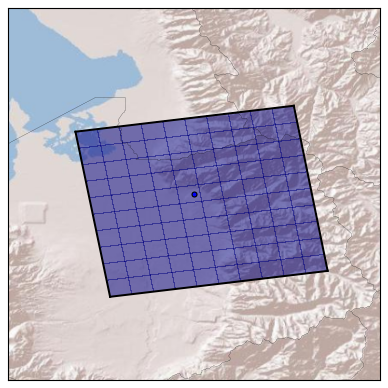

In [38]:
LATS_BOX = lat[x-box_radius:x+box_radius+1,y-box_radius:y+box_radius+1]
LONS_BOX = lon[x-box_radius:x+box_radius+1,y-box_radius:y+box_radius+1]

top_right_lat = LATS_BOX.max()
top_right_lon = LONS_BOX.min()

bot_left_lat = LATS_BOX.min()
bot_left_lon = LONS_BOX.max()

print bot_left_lon, top_right_lon
print bot_left_lat, top_right_lat

m = Basemap(llcrnrlon=MWlon-.3,  urcrnrlon=MWlon+.3,
            llcrnrlat=MWlat-.3, urcrnrlat=MWlat+.3)


m.drawcounties()
m.arcgisimage(service='World_Shaded_Relief')

m.pcolormesh(LONS_BOX, LATS_BOX, np.ones_like(LONS_BOX), alpha=.5)
m.scatter(MWlon, MWlat)

# Bottom Boundary
m.drawgreatcircle(LONS_BOX[0,-1], LATS_BOX[0,-1],
                  LONS_BOX[0,0], LATS_BOX[0,0],
                  color='k')

# Left Boundary
m.drawgreatcircle(LONS_BOX[0,0], LATS_BOX[0,0],
                  LONS_BOX[-1,0], LATS_BOX[-1,0],
                  color='k')

# Top Boundary
m.drawgreatcircle(LONS_BOX[-1,-1], LATS_BOX[-1,-1],
                  LONS_BOX[-1,0], LATS_BOX[-1,0],
                  color='k')

# Right Boundary
m.drawgreatcircle(LONS_BOX[-1,-1], LATS_BOX[-1,-1],
                  LONS_BOX[0,-1], LATS_BOX[0,-1],
                  color='k')

plt.title(stn)

plt.savefig('/uufs/chpc.utah.edu/common/home/u0553130/public_html/PhD/HRRR/OSG/area_current_HRRR/map.png')

# Box and Whisker

In [6]:
DATE = datetime(2018, 2, 10, 0)
var = 'TMP:2 m'
VALID, pollywog = get_hrrr_pollywog(DATE, 'TMP:2 m', MWlat, MWlon,
                                    verbose=False)

In [7]:
if var == 'TMP:2 m' or var == 'DPT:2 m':
    pollywog -= 273.15

In [8]:
variable = var.replace(':', '_').replace(' ', '_')
DIR = '/uufs/chpc.utah.edu/common/home/horel-group2/blaylock/HRRR_OSG/hourly30/%s/' % (variable)

p100 = np.array([])
p75 = np.array([])
p50 = np.array([])
p25 = np.array([])
p00 = np.array([])

for D in VALID:
    FILE = 'OSG_HRRR_%s_m%02d_d%02d_h%02d_f00.h5' % (variable, D.month, D.day, D.hour)
    with h5py.File(DIR+FILE, 'r') as f:
        p100 = np.append(p100, f["p100"][x][y])
        p75 = np.append(p75, f["p75"][x][y])
        p50 = np.append(p50, f["p50"][x][y])
        p25 = np.append(p25, f["p25"][x][y])
        p00 = np.append(p00, f["p00"][x][y])

# Convert Units
if var == 'TMP:2 m' or var == 'DPT:2 m':
    p100 -= 273.15
    p75 -= 273.15
    p50 -= 273.15
    p25 -= 273.15
    p00 -= 273.15
    

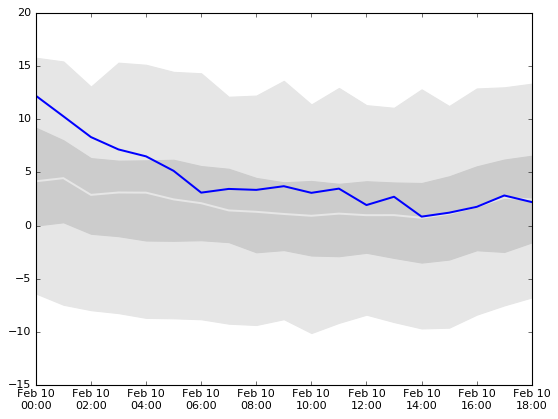

In [24]:
plt.fill_between(VALID, p100, p00, color=[.9,.9,.9])
plt.fill_between(VALID, p75, p25, color=[.8,.8,.8])
plt.plot(VALID, p50, color=[.9,.9,.9])
plt.plot(VALID, pollywog)

plt.gcf().axes[0].xaxis.set_major_formatter(formatter)

In [28]:
DIR+FILE

'/uufs/chpc.utah.edu/common/home/horel-group2/blaylock/HRRR_OSG/hourly30/TMP_2_m/OSG_HRRR_TMP_2_m_m02_d10_h18_f00.h5'